In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
import graphviz 
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import roc_curve, auc
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings(action='ignore') 

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
# 범주형, 수치형 변수 모두 존재한다. y가 target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# 결측치 없음
df.dropna(inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
# 범주형 변수 선택
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# 라벨 인코딩 수행
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 결과 확인
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [7]:
# y컬럼은 y에, 나머지 컬럼은 X에 저장
X = df.drop('y', axis=1)
y = df['y']

In [8]:
# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [16]:
# 컬럼 명들 저장
x_names = X_train.columns.to_list()
y_names = ['no', 'yes'] # 0, 1

In [17]:
# 기본값으로 트리 생성
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train) # 학습

DecisionTreeClassifier(random_state=42)

In [18]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = y_names, feature_names = x_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


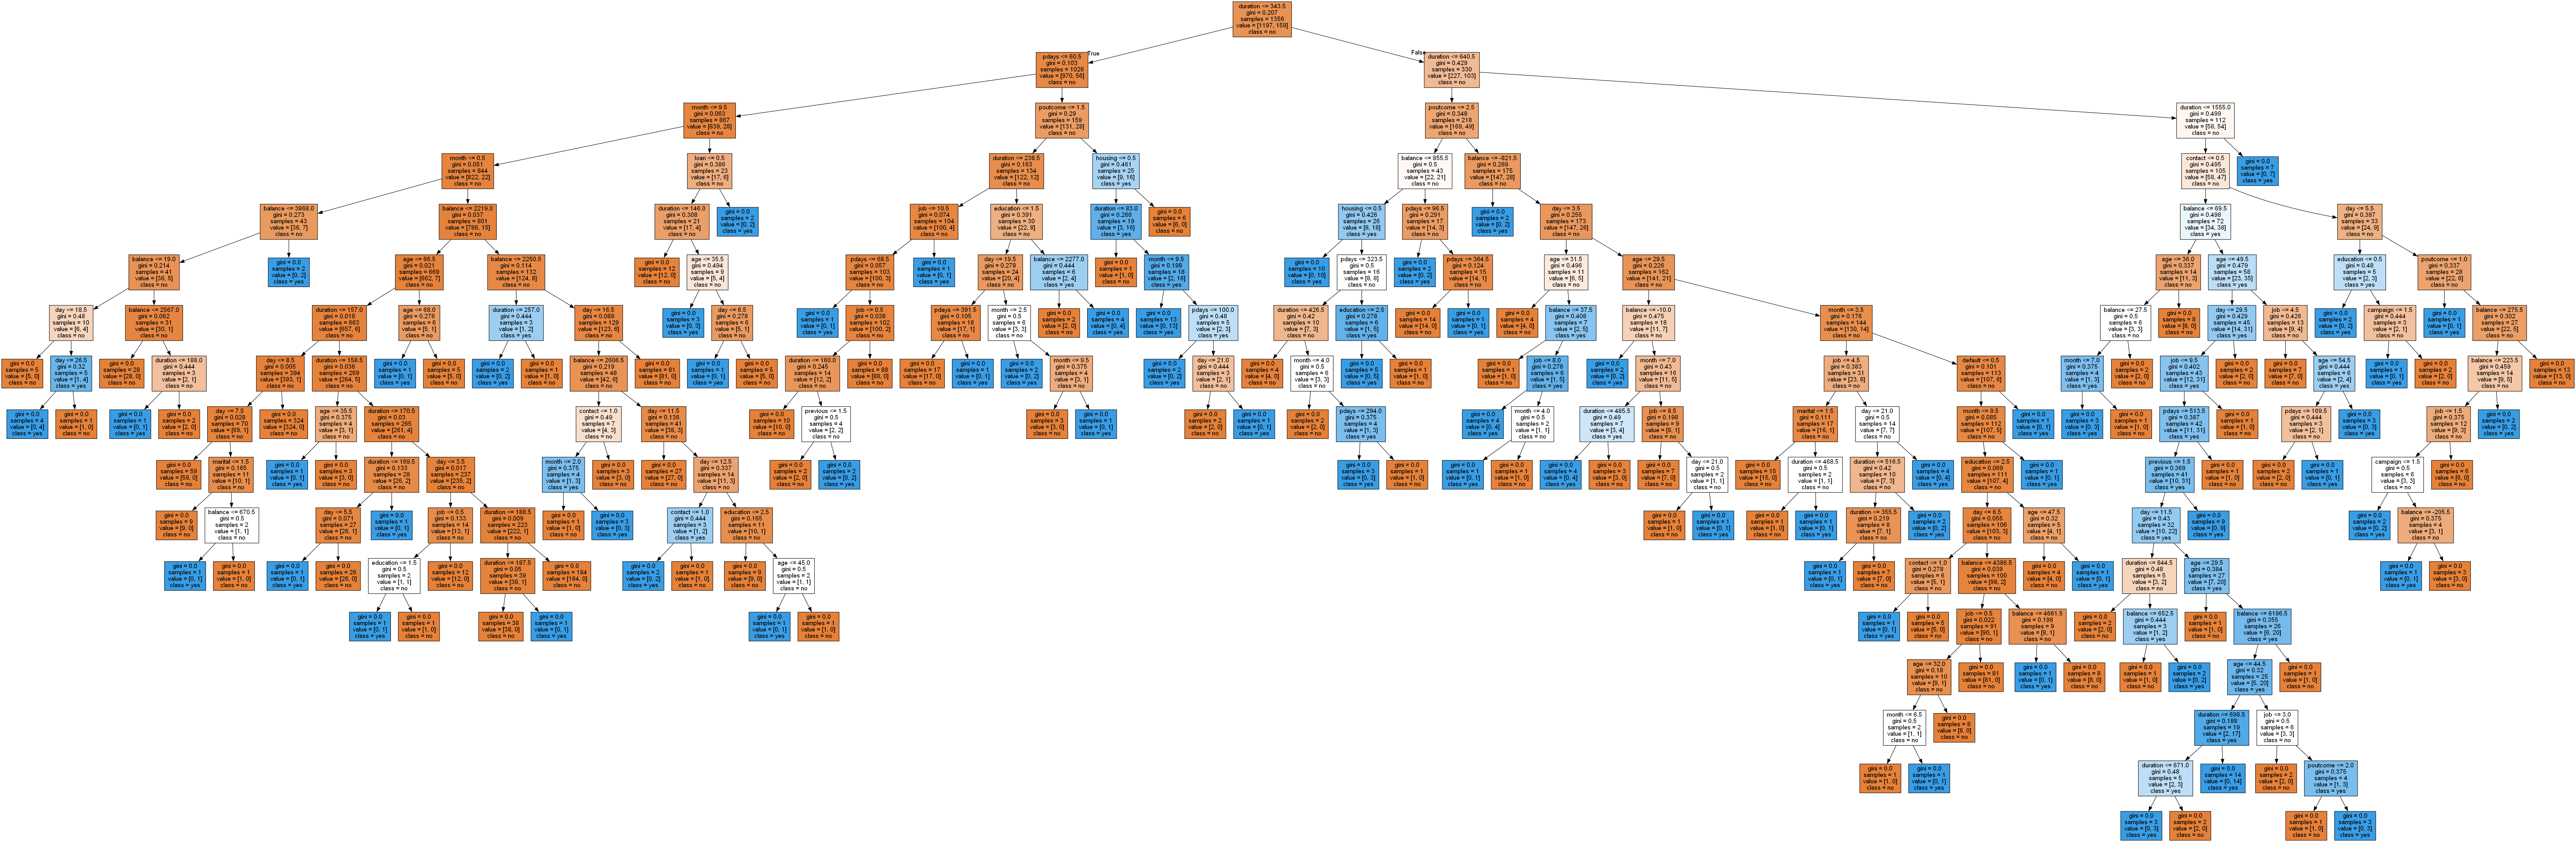

In [19]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src.render(filename='tree', format='png', view=False)
Image('tree.png')

In [20]:
y_pred = dt_clf.predict(X_test) 

# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(X_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(X_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average='weighted')
precision = mt.precision_score(y_test, y_pred,average='weighted')
f1_score = mt.f1_score(y_test, y_pred,average='weighted')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')    # 정확성
print('Recall: ', format(recall,'.2f'),'\n')        # 재현율
print('Precision: ', format(precision,'.2f'),'\n')  # 정밀도
print('F1_score: ', format(f1_score,'.2f'),'\n')    # f1_score
print('Confusion Matrix:','\n', matrix)             # confusion matrix

Train_Accuracy :  1.0 

Test_Accuracy :  0.8505529225908373 

Accuracy:  0.85 

Recall:  0.85 

Precision:  0.85 

F1_score:  0.85 

Confusion Matrix: 
 [[2571  232]
 [ 241  121]]


In [21]:
# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, X, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.8621972326798024


In [22]:
pd.DataFrame(cross_validate(dt_clf, X, y, cv =5))

,fit_time,score_time,test_score
0,0.023002,0.001991,0.868508
1,0.024924,0.003992,0.859513
2,0.024925,0.001995,0.867257
3,0.020939,0.002992,0.859513
4,0.017995,0.001948,0.856195


In [23]:
# test set에 대한 스코어(정확도)
dt_clf.score(X_test, y_test)

0.8505529225908373

In [24]:
# 하이퍼 파라미터 조정 (GridSearch 이용)
dt_clf2 = DecisionTreeClassifier(random_state=42)
parameters = {'splitter':['best','random'], 'max_depth':[3,4,5,6],'min_samples_split':[2,3,4]}
dt_grid=GridSearchCV(dt_clf2, param_grid=parameters, cv=5)
dt_grid.fit(X_train,y_train)
result=pd.DataFrame(dt_grid.cv_results_['params'])
result['mean_test_score'] = dt_grid.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
1,3,2,random,0.893076
3,3,3,random,0.893076
5,3,4,random,0.893076
15,5,3,random,0.887907
13,5,2,random,0.887907
17,5,4,random,0.886431
6,4,2,best,0.885707
8,4,3,best,0.885707
10,4,4,best,0.885707
23,6,4,random,0.882744


In [25]:
dt_clf_final = DecisionTreeClassifier(max_depth=3, min_samples_split=2, splitter='random')

dt_clf_final.fit(X_train, y_train)
y_pred = dt_clf_final.predict(X_test) 
# 학습결과 평가
print("Train_Accuracy : ", dt_clf_final.score(X_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf_final.score(X_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average='weighted')
precision = mt.precision_score(y_test, y_pred,average='weighted')
f1_score = mt.f1_score(y_test, y_pred, average='weighted')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)


Train_Accuracy :  0.8871681415929203 

Test_Accuracy :  0.8856240126382307 

Accuracy:  0.89 

Recall:  0.89 

Precision:  0.84 

F1_score:  0.83 

Confusion Matrix: 
 [[2798    5]
 [ 357    5]]


In [26]:
# 각 폴드의 스코어 
scores = cross_val_score(dt_clf_final, X, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.8854231653058232


In [27]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 prunedtree.dot 파일을 생성함
export_graphviz(dt_clf_final, out_file="prunedtree.dot", class_names = y_names, feature_names = x_names, impurity=True, filled=True)

[ max_depth가 3인 경우의 Decision Tree 시각화 ]


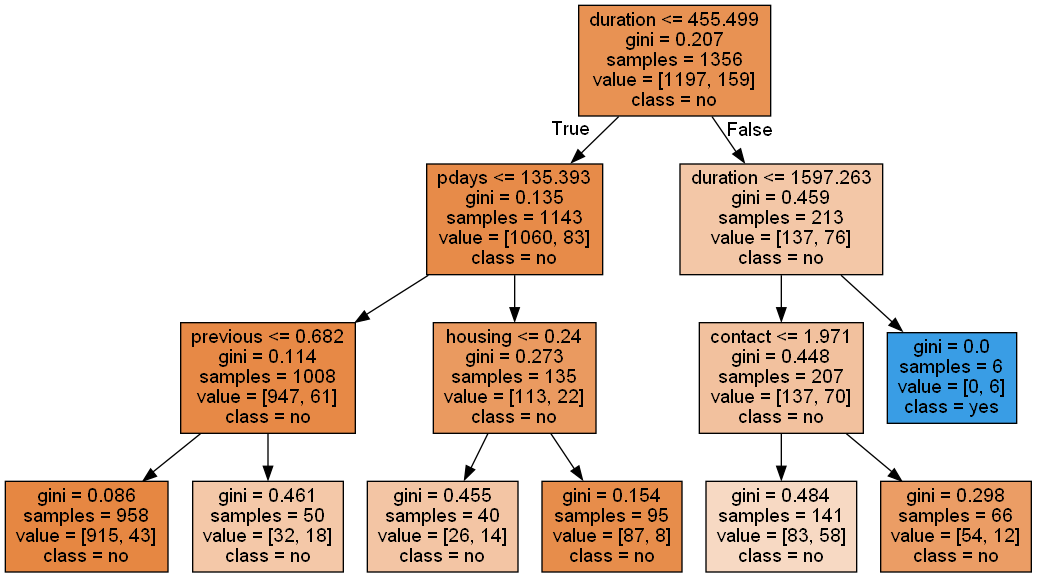

In [28]:
print('[ max_depth가 3인 경우의 Decision Tree 시각화 ]')

# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src.render(filename='prunedtree', format='png', view=False)
Image('prunedtree.png')

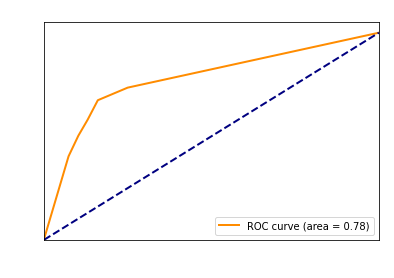

In [29]:
# ROC Curve
y_prob = dt_clf_final.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()